## **`Use Clustering Techniques for the any customer dataset using machine learning`**

**Importing required libraries:**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load the data set:**

In [39]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\task-1 internsavy\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
df.shape

(200, 5)

In [42]:
df=df.drop('CustomerID' , axis=1)

In [43]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [44]:
df['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

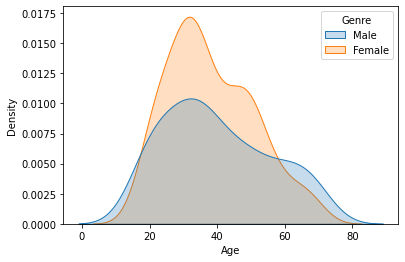

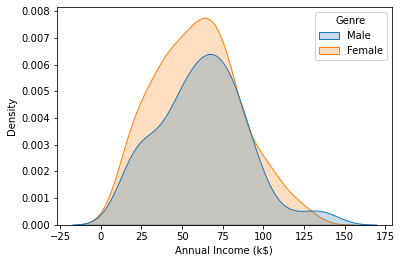

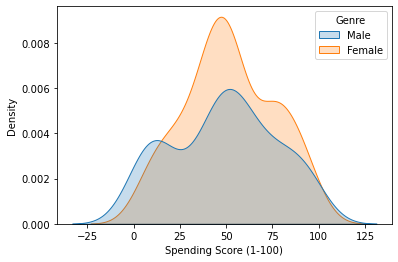

In [45]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Genre')

In [46]:
df.groupby(['Genre'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [47]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [48]:
# Convert 'Genre' to numerical values
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])

In [49]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [50]:
# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [51]:
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

**KMeans Clustering :**

In [52]:
from sklearn.cluster import KMeans

# Choose the number of clusters (K)
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [53]:
#Analyze the clusters
cluster_means = df.groupby('Cluster').mean()
cluster_means

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.425532,55.638298,54.382979,48.851064
1,0.450000,32.875000,86.100000,81.525000
2,0.407407,25.185185,41.092593,62.240741
3,0.400000,46.250000,26.750000,18.350000
4,0.512821,39.871795,86.102564,19.358974


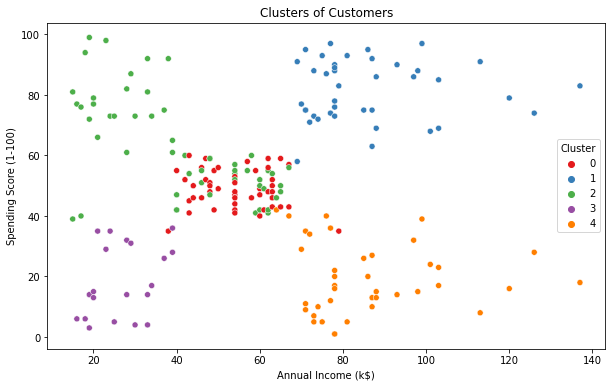

In [54]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Hierarchial Clustering :**

Hierarchical clustering creates a hierarchy of clusters by either starting with each point as its own cluster (agglomerative approach) or starting with all points in one cluster and recursively splitting them (divisive approach). 

In [55]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
# Applying Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
df['Agg_Cluster'] = agg_clustering.fit_predict(scaled_data)

In [57]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster,Agg_Cluster
0,1,19,15,39,2,4
1,1,21,15,81,2,0
2,0,20,16,6,3,4
3,0,23,16,77,2,0
4,0,31,17,40,2,4
...,...,...,...,...,...,...
195,0,35,120,79,1,2
196,0,45,126,28,4,3
197,1,32,126,74,1,2
198,1,32,137,18,4,3


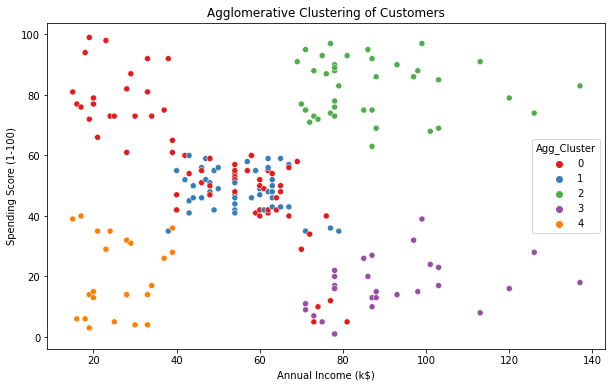

In [58]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster', data=df, palette='Set1')
plt.title('Agglomerative Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()